In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import seaborn as sns
sns.set(color_codes = True)
pd.set_option('display.max_columns', None)

import warnings
warnings. filterwarnings('ignore')

In [3]:
# import data1
# df = pd.read_excel(file_with_data, sheetname=sheet_with_data)
trans = pd.read_excel('CD_Store_data.xlsx',sheet_name='Transactions') 
# import data2
demo = pd.read_excel('CD_Store_data.xlsx', sheet_name='Demographics') 


In [4]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          69659 non-null  int64  
 1   Date of Transaction  69659 non-null  int64  
 2   # of CDs             69658 non-null  float64
 3   $ Value              69659 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 2.1 MB


In [5]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23570 entries, 0 to 23569
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   23570 non-null  int64 
 1   Gender        23570 non-null  object
 2   Total Visits  23570 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 552.5+ KB


In [6]:
trans.head()

,Customer ID,Date of Transaction,# of CDs,$ Value
0,1,19970101,1.0,11.77
1,2,19970112,1.0,12.00
2,2,19970112,5.0,77.00
3,3,19970102,2.0,20.76
4,3,19970330,2.0,20.76


In [7]:
demo.head()

,Customer ID,Gender,Total Visits
0,1,F,21
1,2,M,44
2,3,M,26
3,4,M,49
4,5,F,47


In [8]:
trans = trans.rename(columns = {'Customer ID': 'customerid',
                                'Date of Transaction': 'date',
                                '# of CDs': 'numofcd',
                                '$ Value': 'value'})

In [9]:
demo = demo.rename(columns = {'Customer ID': 'customerid',
                                'Total Visits': 'visits'})

In [10]:
trans.date = pd.to_datetime(trans.date, format='%Y%m%d')

In [11]:
trans.head()

,customerid,date,numofcd,value
0,1,1997-01-01,1.0,11.77
1,2,1997-01-12,1.0,12.00
2,2,1997-01-12,5.0,77.00
3,3,1997-01-02,2.0,20.76
4,3,1997-03-30,2.0,20.76


In [ ]:
What's the revenue trend?

In [13]:
# aggregation
df1_1 = trans.groupby(['date']).agg('sum')['value']

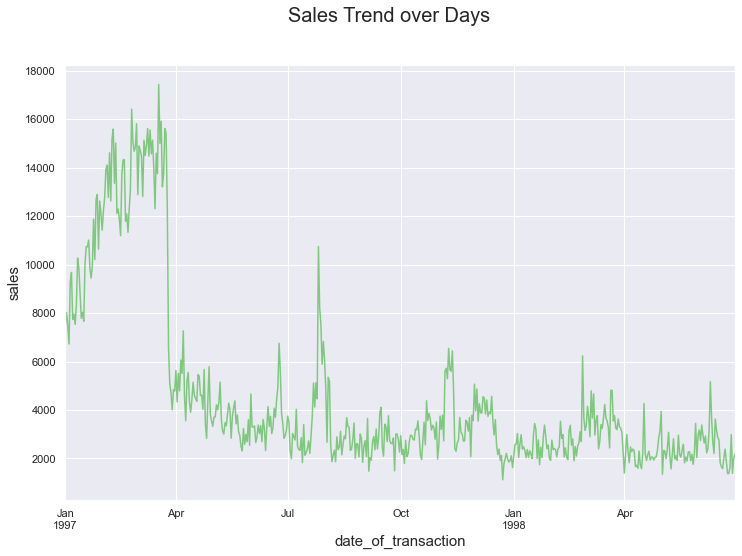

In [14]:
fig, ax1 = plt.subplots(figsize=(12,8))
fig.suptitle('Sales Trend over Days', fontsize=20)
cmap = sns.color_palette("Accent")
df1_1.plot(color=cmap)
plt.xlabel('date_of_transaction', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.show()

CD sales increase a little bit since Jan 1997, then keep descreasing and staying low, though reached some peaks, the overall is low.

In [15]:
trans['month_year'] = trans['date'].dt.to_period('M')
df1_2 = trans.groupby(['month_year']).agg('sum')['value']

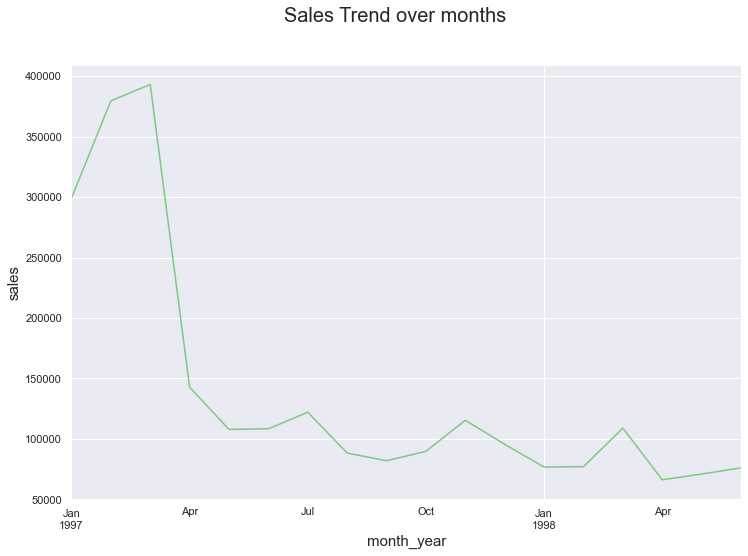

In [16]:
fig, ax1 = plt.subplots(figsize=(12,8))
fig.suptitle('Sales Trend over months', fontsize=20)
cmap = sns.color_palette("Accent")
df1_2.plot(color=cmap)
plt.xlabel('month_year', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.show()

The revenue is increasing from Jan to March in 1997.

In the first three month, the revenue is highest, but there is a sharp decrease in the fourth month, April 1997.

The revenue is smoothly decreasing from April 1997 to June 1998.

In [ ]:
Are we getting enough visitors to the store?

In [17]:
df = pd.merge(trans, demo, how='inner', on='customerid')

In [18]:
df2_1= df[['month_year', 'customerid']].groupby('month_year').agg({'customerid': pd.Series.nunique})
df2_1 = df2_1.rename(columns = {'customerid':'num_customers'})
df2_1.reset_index('month_year',inplace=True)

In [19]:
df2_1['last_num_customers'] = df2_1['num_customers'].shift(periods=1)
df2_1['num_churned'] = df2_1['last_num_customers'] - df2_1['num_customers']
df2_1['churn_rate'] = df2_1['num_churned']/df2_1['last_num_customers']
df2_1.drop('last_num_customers',axis=1,inplace=True)

In [20]:
df2_1

,month_year,num_customers,num_churned,churn_rate
0,1997-01,7846,NaN,NaN
1,1997-02,9633,-1787.0,-0.227759
2,1997-03,9524,109.0,0.011315
3,1997-04,2822,6702.0,0.703696
4,1997-05,2214,608.0,0.215450
5,1997-06,2339,-125.0,-0.056459
6,1997-07,2180,159.0,0.067978
7,1997-08,1772,408.0,0.187156
8,1997-09,1739,33.0,0.018623
9,1997-10,1839,-100.0,-0.057504


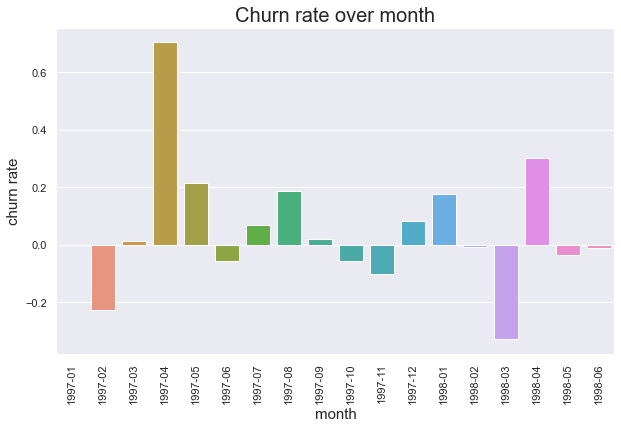

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(df2_1.month_year, df2_1.churn_rate)
plt.title('Churn rate over month', size=20)
ax.tick_params(axis="x", rotation=90)
plt.ylabel('churn rate', size=15)
plt.xlabel('month', size=15)
plt.show()

After a increase in the spring, churn rate always go high, though the overall trend seems going well.

In [22]:
df2_2 = df
df2_2['trans_id'] = df.index

In [23]:
df2_2.head()

,customerid,date,numofcd,value,month_year,Gender,visits,trans_id
0,1,1997-01-01,1.0,11.77,1997-01,F,21,0
1,2,1997-01-12,1.0,12.00,1997-01,M,44,1
2,2,1997-01-12,5.0,77.00,1997-01,M,44,2
3,3,1997-01-02,2.0,20.76,1997-01,M,26,3
4,3,1997-03-30,2.0,20.76,1997-03,M,26,4


In [24]:
df2_2['cohort_month'] = df.groupby('customerid')['month_year'].transform('min')

In [25]:
df2_2.head()

,customerid,date,numofcd,value,month_year,Gender,visits,trans_id,cohort_month
0,1,1997-01-01,1.0,11.77,1997-01,F,21,0,1997-01
1,2,1997-01-12,1.0,12.00,1997-01,M,44,1,1997-01
2,2,1997-01-12,5.0,77.00,1997-01,M,44,2,1997-01
3,3,1997-01-02,2.0,20.76,1997-01,M,26,3,1997-01
4,3,1997-03-30,2.0,20.76,1997-03,M,26,4,1997-01


In [26]:
grouped = df2_2.groupby(['cohort_month','month_year'])


In [27]:
cohorts = grouped.agg({'customerid': pd.Series.nunique,
                      'trans_id': pd.Series.nunique})
cohorts.rename(columns={'customerid':'total_customers',
                       'trans_id':'total_transs'}, inplace=True)

In [28]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [29]:
cohorts

total_customers  total_transs  cohort_period
cohort_month month_year                                              
1997-01      1997-01                7846          8928              1
             1997-02                1157          1627              2
             1997-03                 964          1329              3
             1997-04                 810          1091              4
             1997-05                 679           904              5
             1997-06                 736           976              6
             1997-07                 720           994              7
             1997-08                 582           785              8
             1997-09                 559           766              9
             1997-10                 594           906             10
             1997-11                 673           936             11
             1997-12                 634           855             12
             1998-01                 528           684             13
             1998-02                 511           663             14
             1998-03                 664           924             15
             1998-04                 472           617             16
             1998-05                 497           659             17
             1998-06                 498           707             18
1997-02      1997-02                8476          9645              1
             1997-03                1312          1745              2
             1997-04                 980          1302              3
             1997-05                 783          1037              4
             1997-06                 847          1108              5
             1997-07                 786          1061              6
             1997-08                 626           809              7
             1997-09                 619           814              8
             1997-10                 666           916              9
             1997-11                 721           940             10
             1997-12                 661           876             11
             1998-01                 545           726             12
             1998-02                 568           736             13
             1998-03                 718           970             14
             1998-04                 545           728             15
             1998-05                 548           743             16
             1998-06                 551           738             17
1997-03      1997-03                7248          8524              1
             1997-04                1032          1388              2
             1997-05                 752           954              3
             1997-06                 756           970              4
             1997-07                 674           887              5
             1997-08                 564           726              6
             1997-09                 561           716              7
             1997-10                 579           740              8
             1997-11                 634           874              9
             1997-12                 569           773             10
             1998-01                 464           622             11
             1998-02                 472           627             12
             1998-03                 678           899             13
             1998-04                 420           533             14
             1998-05                 443           583             15
             1998-06                 457           598             16

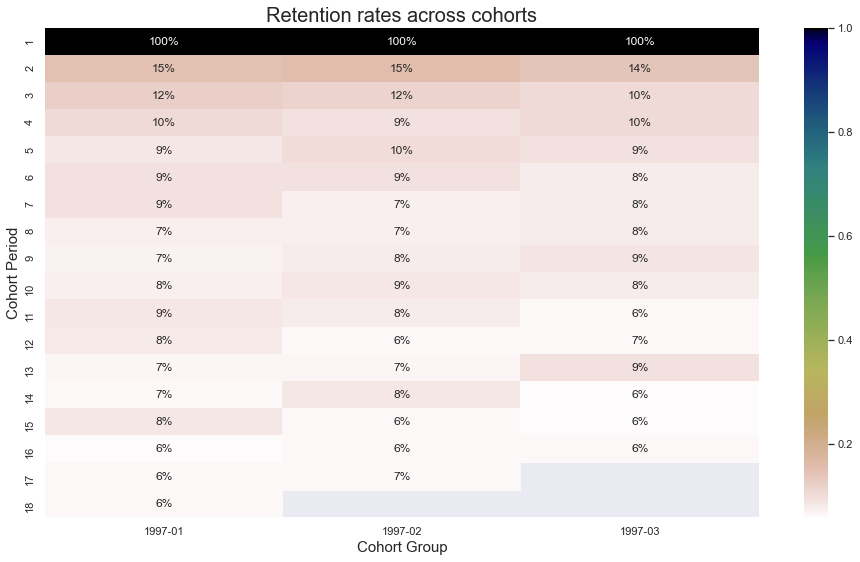

In [30]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_month', 'cohort_period'], inplace=True)

cohort_sizes = cohorts.groupby(level=0)['total_customers'].first()

user_retention = cohorts['total_customers'].unstack(0).divide(cohort_sizes, axis = 1)
plt.figure(figsize=(16,9))
ax = sns.heatmap(user_retention, annot=True, cmap = 'gist_earth_r', fmt='.0%')

ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)

ax.set_title('Retention rates across cohorts', fontsize = 20)
plt.show()

No new customers after March 1997, the retention rate is fair.

How many of them are buying?

In [31]:
dates = (df.date.max() - df.date.min()).days


In [32]:
total_visits = demo.visits.sum()


In [33]:
average_visits_per_day = total_visits/dates


In [34]:
num_transactions = trans.shape[0]
buy_pec = num_transactions/total_visits

In [35]:
print('There are {:0.0f} vistis per day, {:0.2f}% of them are buying.'.format(average_visits_per_day, buy_pec*100))

There are 1253 vistis per day, 10.20% of them are buying.


There are 1253 vistis per day, 10.20% of them are buying.

Are men and women different?

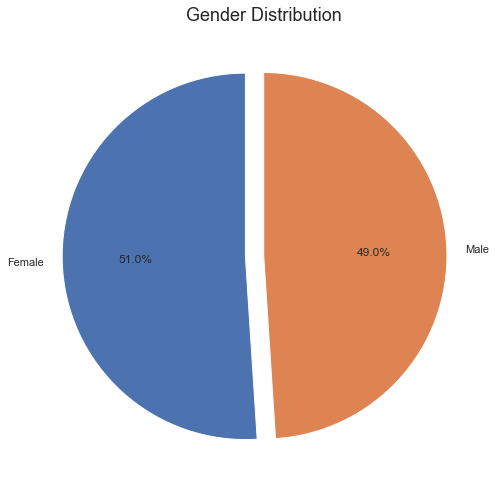

In [36]:
explode = (0.1,0)  
fig, ax = plt.subplots(figsize=(12,7))
ax.pie(df['Gender'].value_counts(), explode=explode, labels=['Female','Male'], autopct='%1.1f%%',
        shadow=False, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle  
ax.set_title('Gender Distribution', fontsize = 18)
plt.tight_layout()

There's no significant difference of the number of customers between female and male.

In [37]:
df4 = df.groupby(['Gender']).agg({'numofcd':'sum',
                                  'value':'sum',
                                # 'visits':'sum',
                                 'trans_id':'count',
                                 'customerid': 'nunique'})

In [38]:
df4.head()

,numofcd,value,trans_id,customerid
Gender,,,,
F,86568.0,1288148.96,35544,11885
M,81351.0,1212166.67,34115,11685


In [39]:
df4_1 = demo.groupby(['Gender']).agg({'visits':'sum'})

In [40]:
df4_1

,visits
Gender,
F,343767
M,338993


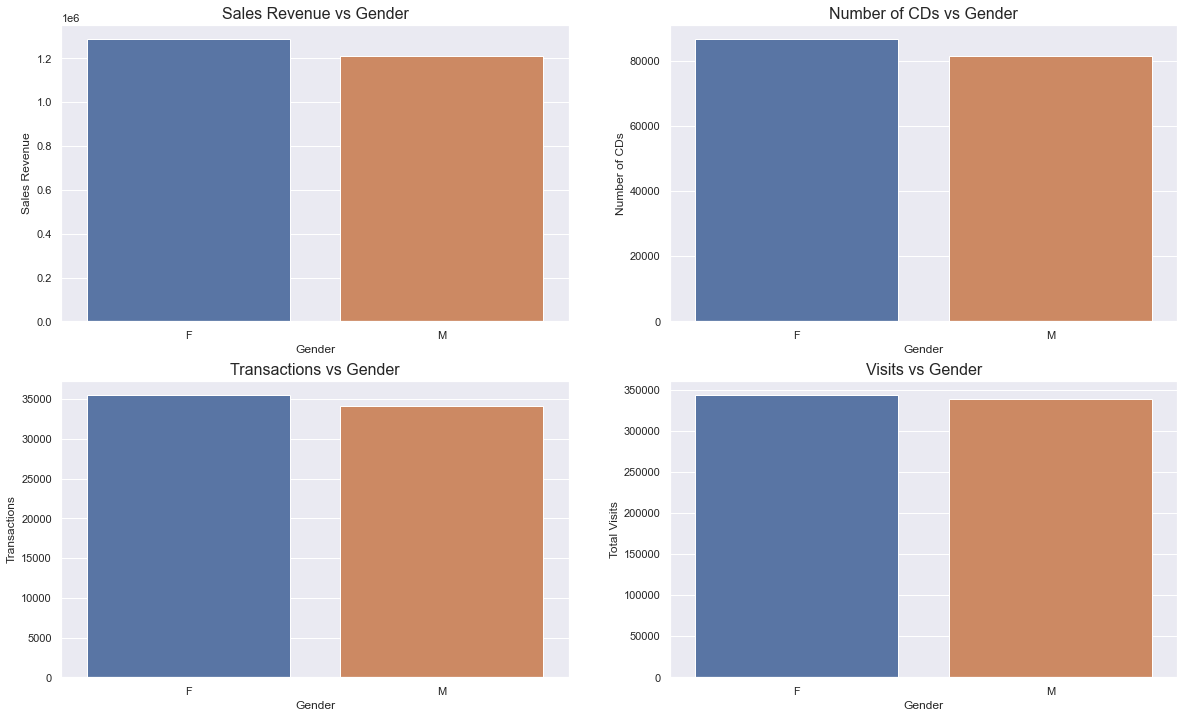

In [41]:
# plot sales and visits over genders
fig = plt.figure(figsize=(20,12))

ax1 = plt.subplot(221)
ax1 = sns.barplot(y=df4['value'], x=df4.index)
ax1.set_xlabel('Gender', fontsize=12)
ax1.set_ylabel('Sales Revenue')
ax1.set_title('Sales Revenue vs Gender', fontsize=16)

ax2 = plt.subplot(222)
ax2 = sns.barplot(y=df4['numofcd'], x=df4.index)
ax2.set_xlabel('Gender', fontsize=12)
ax2.set_ylabel('Number of CDs')
ax2.set_title('Number of CDs vs Gender', fontsize=16)

ax3 = plt.subplot(223)
ax3 = sns.barplot(y=df4['trans_id'], x=df4.index)
ax3.set_xlabel('Gender', fontsize=12)
ax3.set_ylabel('Transactions')
ax3.set_title('Transactions vs Gender', fontsize=16)

ax4 = plt.subplot(224)
ax4 = sns.barplot(y=df4_1.visits, x=df4_1.index)
ax4.set_xlabel('Gender', fontsize=12)
ax4.set_ylabel('Total Visits')
ax4.set_title('Visits vs Gender', fontsize=16)

plt.show()

The sales revenue, number of CDs, transactions, and total visits from female customer is higher than male.

In [42]:
df.head()

,customerid,date,numofcd,value,month_year,Gender,visits,trans_id,cohort_month
0,1,1997-01-01,1.0,11.77,1997-01,F,21,0,1997-01
1,2,1997-01-12,1.0,12.00,1997-01,M,44,1,1997-01
2,2,1997-01-12,5.0,77.00,1997-01,M,44,2,1997-01
3,3,1997-01-02,2.0,20.76,1997-01,M,26,3,1997-01
4,3,1997-03-30,2.0,20.76,1997-03,M,26,4,1997-01


In [43]:
df5 = df.groupby(['Gender','month_year']).agg({'numofcd':'sum',
                                  'value':'sum',
                                 'trans_id':'count',
                                 'customerid': 'nunique'})

In [44]:
df5 = df5.reset_index()
df5.head()

,Gender,month_year,numofcd,value,trans_id,customerid
0,F,1997-01,9942.0,153309.05,4570,3998
1,F,1997-02,12838.0,195650.35,5680,4846
2,F,1997-03,13225.0,197821.05,5845,4818
3,F,1997-04,5135.0,74644.58,1966,1453
4,F,1997-05,3905.0,58141.27,1489,1122


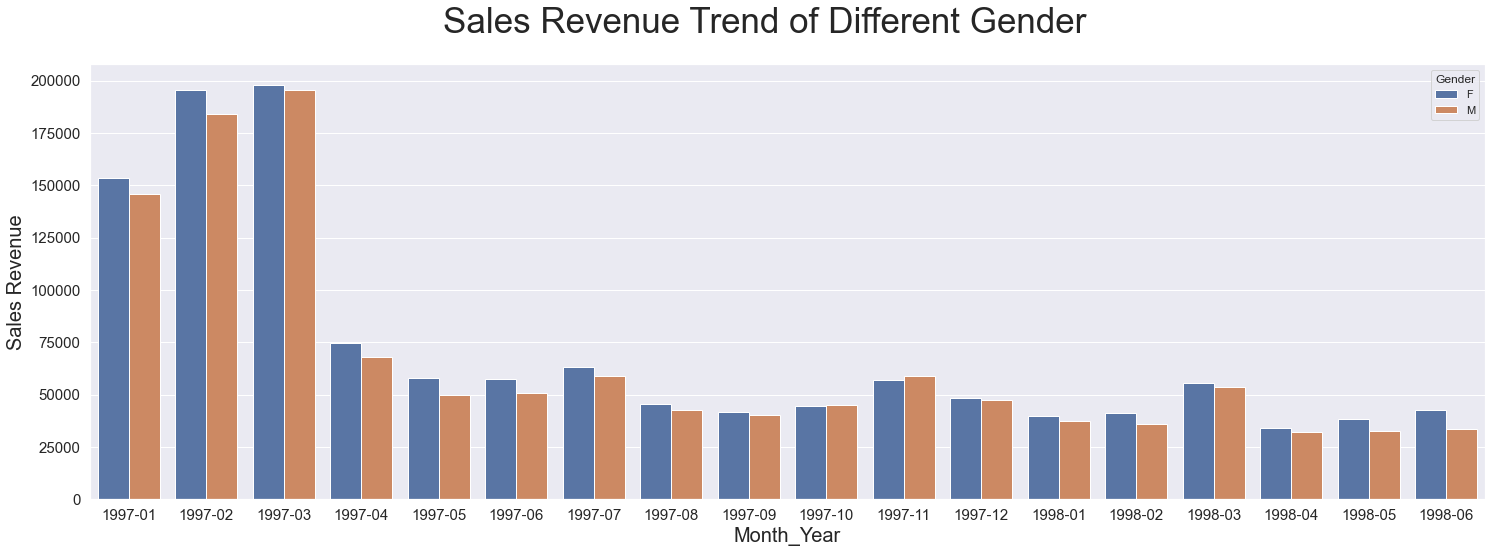

In [45]:
fig, ax = plt.subplots(figsize=(25,8))
fig.suptitle('Sales Revenue Trend of Different Gender', fontsize=35)
ax = sns.barplot(data=df5, x='month_year', y='value', hue='Gender')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Sales Revenue', fontsize=20)
plt.xlabel('Month_Year', fontsize=20)
plt.show()

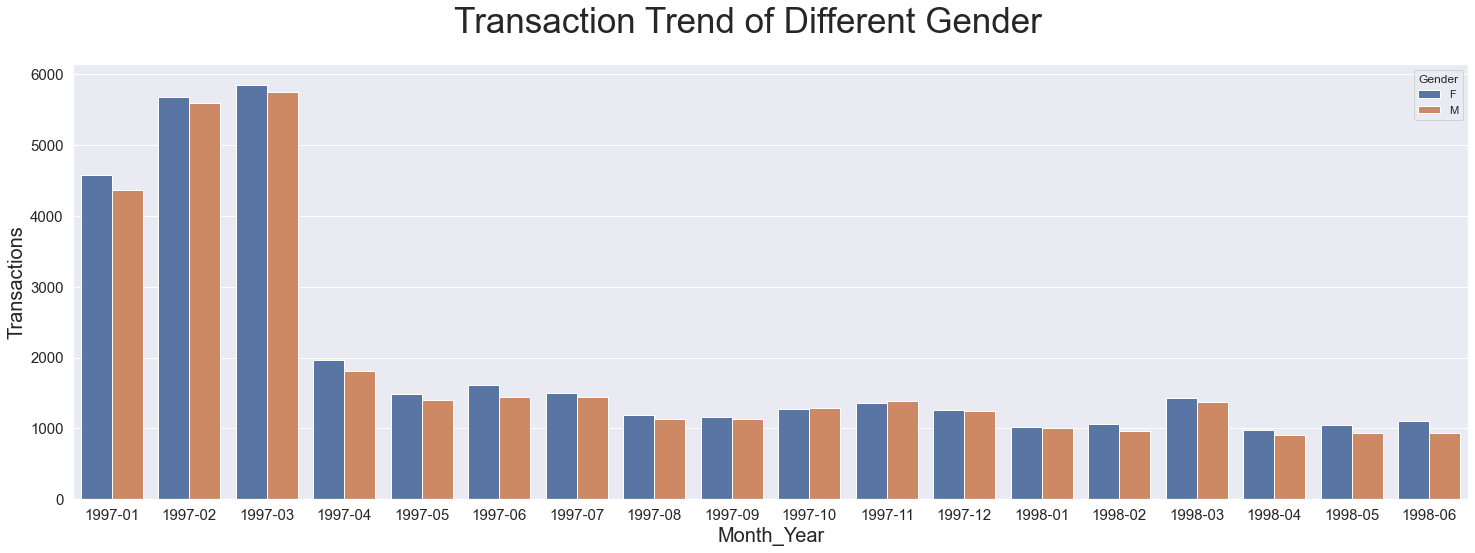

In [46]:
fig, ax = plt.subplots(figsize=(25,8))
fig.suptitle('Transaction Trend of Different Gender', fontsize=35)
ax = sns.barplot(data=df5, x='month_year', y='trans_id', hue='Gender')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Transactions', fontsize=20)
plt.xlabel('Month_Year', fontsize=20)
plt.show()

In general, the sales revenue and transactions from female customers are higher than male, except Oct, Nov 1997.